# Phishing Detector with LR

DESCRIPTION

Background of Problem Statement :
You are expected to write the code for a binary classification model (phishing website or not) using Python Scikit-Learn that trains on the data and calculates the accuracy score on the test data. You have to use one or more of the classification algorithms to train a model on the phishing website dataset.

Problem Objective :
The dataset is a text file which provides the following resources that can be used as inputs for model building :
A collection of website URLs for 11000+ websites. 
Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).
 
The code template containing these code blocks:
Import modules (Part 1)
Load data function + input/output field descriptions
The dataset also serves as an input for project scoping and tries to specify the functional and non-functional requirements for it.

Domain: Cyber Security and Web Mining

Questions to be answered with analysis :

Write the code for a binary classification model (phishing website or not) using Python Scikit-Learn that trains on the data and calculates the accuracy score on the test data.
Use one or more of the classification algorithms to train a model on the phishing website dataset.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
df=pd.read_csv('phishing.txt',sep=',',header=None)
df.columns=[ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class' ]

In [14]:
df.head(2)

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1


In [27]:
df.columns,df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
UsingIP                11055 non-null int64
LongURL                11055 non-null int64
ShortURL               11055 non-null int64
Symbol@                11055 non-null int64
Redirecting//          11055 non-null int64
PrefixSuffix-          11055 non-null int64
SubDomains             11055 non-null int64
HTTPS                  11055 non-null int64
DomainRegLen           11055 non-null int64
Favicon                11055 non-null int64
NonStdPort             11055 non-null int64
HTTPSDomainURL         11055 non-null int64
RequestURL             11055 non-null int64
AnchorURL              11055 non-null int64
LinksInScriptTags      11055 non-null int64
ServerFormHandler      11055 non-null int64
InfoEmail              11055 non-null int64
AbnormalURL            11055 non-null int64
WebsiteForwarding      11055 non-null int64
StatusBarCust          11055 non-null int64
DisableRigh

(Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
        'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
        'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
        'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
        'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
        'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
        'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
        'StatsReport', 'class'],
       dtype='object'), (11055, 31), None)

In [18]:
df.dtypes

UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort             int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
InfoEmail              int64
AbnormalURL            int64
WebsiteForwarding      int64
StatusBarCust          int64
DisableRightClick      int64
UsingPopupWindow       int64
IframeRedirection      int64
AgeofDomain            int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
StatsReport            int64
class                  int64
dtype: object

In [28]:
df.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
target='class'
x=df[[col for col in df.columns if col != target]]
y=df['class']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print('x_train:-',x_train.shape)
print('x_test:-',x_test.shape)
print('y_train:-',y_train.shape)
print('y_test:-',y_test.shape)

x_train:- (7738, 30)
x_test:- (3317, 30)
y_train:- (7738,)
y_test:- (3317,)


### Build a phishing website classifier using Logistic Regression with “C” parameter = 100

In [98]:
logreg=LogisticRegression(C=100)
logreg.fit(x_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
y_test.value_counts()

 1    1827
-1    1490
Name: class, dtype: int64

In [100]:
from sklearn.model_selection import cross_validate

In [101]:
scores=cross_validate(logreg,X=x,y=y, scoring='accuracy',cv=10)

for i in scores.keys():
    print(i,scores[i].mean()) # Not much of overfitting , even with a high value for C parameter

fit_time 0.3581591844558716
score_time 0.004431462287902832
test_score 0.9253719904201467
train_score 0.9283984135274632


In [88]:
y_pred1=logreg.predict(x_test)
print("Accuracy score of logistic regression with C as 100 is {0:.02f}%".format(accuracy_score(y_test,y_pred1)), end='\n\n')
print("misclassification rate of test data is {0:.02f}% " .format(1-accuracy_score(y_test,y_pred1)),end='\n\n')
print("confusion matrix") 
print("----------------")
print(confusion_matrix(y_test,y_pred1,labels=[-1,1]), end='\n\n')
print("Classification Report") 
print("----------------")
print(classification_report(y_test,y_pred1))

Accuracy score of logistic regression with C as 100 is 0.93%

misclassification rate of test data is 0.07% 

confusion matrix
----------------
[[1343  147]
 [  99 1728]]

Classification Report
----------------
              precision    recall  f1-score   support

          -1       0.93      0.90      0.92      1490
           1       0.92      0.95      0.93      1827

   micro avg       0.93      0.93      0.93      3317
   macro avg       0.93      0.92      0.92      3317
weighted avg       0.93      0.93      0.93      3317



In [58]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [64]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred1)
fpr,tpr,thresholds

(array([0.        , 0.09865772, 1.        ]),
 array([0.        , 0.94581281, 1.        ]),
 array([ 2,  1, -1], dtype=int64))

In [65]:
auc_score=roc_auc_score(y_test,y_pred1)
auc_score

0.923577544880484

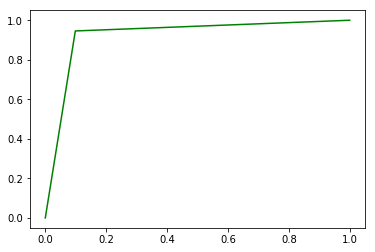

In [72]:
plt.plot(fpr,tpr,c='g',fillstyle='full')

In [73]:
from yellowbrick.classifier import ConfusionMatrix,class_prediction_error

0.9258365993367501

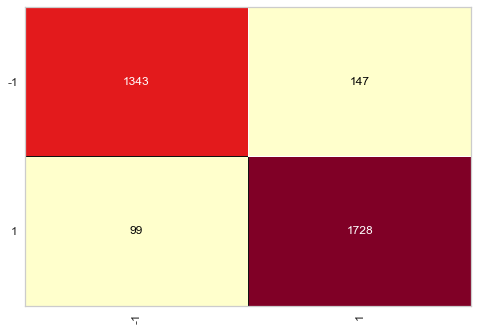

In [79]:
cm=ConfusionMatrix(logreg)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

ClassPredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE1BD0C2E8>,
           classes=None, encoder=None, force_model=False, is_fitted='auto',
           model=None)

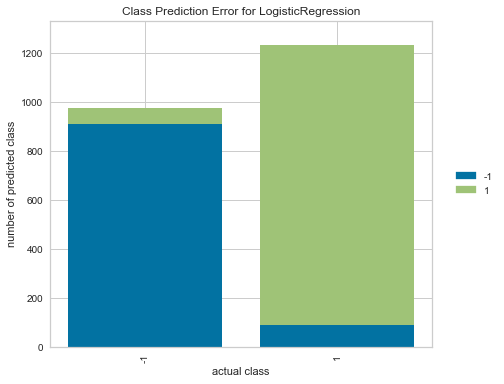

In [80]:
class_prediction_error(logreg,x,y)

### Train with only two input parameters - parameter Prefix_Suffix and 13 URL_of_Anchor

In [105]:
df.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [108]:
input_cols=['PrefixSuffix-','AnchorURL']
x_train=x_train[input_cols]
x_test=x_test[input_cols]

In [109]:
print('x_train:-',x_train.shape)
print('x_test:-',x_test.shape)
print('y_train:-',y_train.shape)
print('y_test:-',y_test.shape)

x_train:- (7738, 2)
x_test:- (3317, 2)
y_train:- (7738,)
y_test:- (3317,)


In [110]:
logreg.fit(x_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
y_pred2=logreg.predict(x_test)

In [112]:
print("Accuracy score of logistic regression with 2 features is {0:.02f}%".format(accuracy_score(y_test,y_pred2)), end='\n\n')
print("misclassification rate of test data is {0:.02f}% " .format(1-accuracy_score(y_test,y_pred2)),end='\n\n')
print("confusion matrix") 
print("----------------")
print(confusion_matrix(y_test,y_pred2,labels=[-1,1]), end='\n\n')
print("Classification Report") 
print("----------------")
print(classification_report(y_test,y_pred2))

Accuracy score of logistic regression with 2 features is 0.85%

misclassification rate of test data is 0.15% 

confusion matrix
----------------
[[ 996  494]
 [   3 1824]]

Classification Report
----------------
              precision    recall  f1-score   support

          -1       1.00      0.67      0.80      1490
           1       0.79      1.00      0.88      1827

   micro avg       0.85      0.85      0.85      3317
   macro avg       0.89      0.83      0.84      3317
weighted avg       0.88      0.85      0.84      3317



Two input features are enough to get an accuracy score of 85%

In [114]:
from mlxtend.plotting import plot_decision_regions

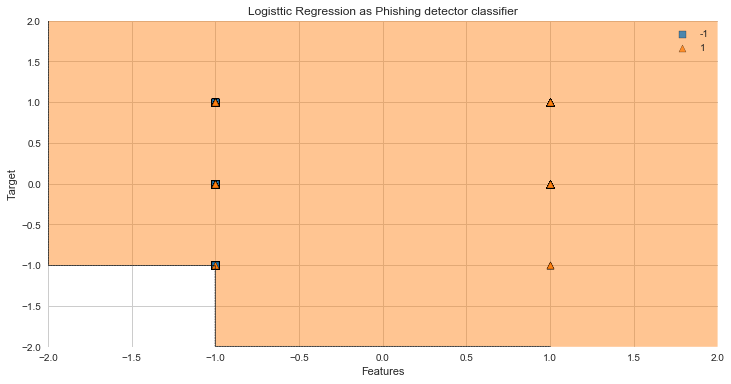

In [138]:
#x_new=x_test.iloc[:,0:2].values
#y_new=y_test.values
logreg.fit(x_new,y_new)

plt.figure(figsize=(12,6))
plot_decision_regions(X=x_test,y=y_test.values,clf=logreg)

# Adding axes annotations
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Logisttic Regression as Phishing detector classifier')
plt.show()

In [155]:
from sklearn.svm import SVC

In [159]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred3=svc.predict(x_test)
accuracy_score(y_test,y_pred3)

0.8501658124811576

In [146]:

model=[logreg,svc]
h=0.02

from matplotlib.colors import ListedColormap

# Create list of three colors (corresponding to two class values)
light_colors =  ListedColormap(['gray', 'c'])      # 'c' for cyan and 'g' for green
bold_colors  =  ListedColormap(['r',    'k'])      # 'r' for red  and 'k' for black 

#light_colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
#bold_colors  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

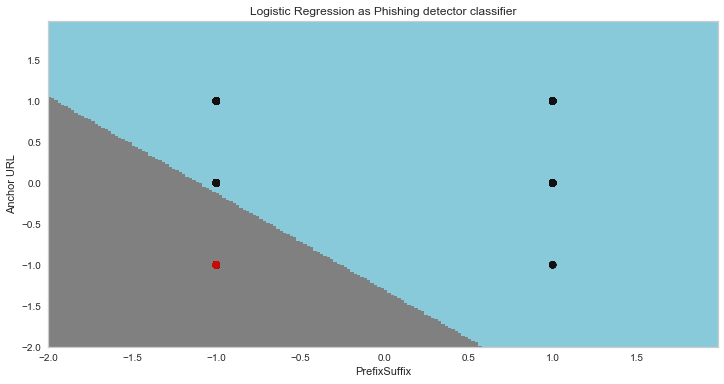

In [160]:
# X - some data in 2dimensional np.array
    
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# here "model" is your model's prediction (classification) function
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure(figsize=(12,6))
plt.pcolormesh(xx, yy, Z,  cmap=light_colors)

# Plot the test points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=bold_colors)
plt.xlabel('PrefixSuffix')
plt.ylabel('Anchor URL')
plt.title('Logistic Regression as Phishing detector classifier')
plt.show()

In [163]:
for i in model:
    x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
    y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

   # here "model" is your model's prediction (classification) function
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)

   # Put the result into a color plot
    plt.figure(figsize=(12,6))
    plt.pcolormesh(xx, yy, Z,  cmap=light_colors)

    # Plot the test points
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=bold_colors)
    plt.xlabel('PrefixSuffix')
    plt.ylabel('Anchor URL')
    plt.title('Logistic Regression as Phishing detector classifier')
    plt.show()

TypeError: 'LogisticRegression' object is not iterable